In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import load
import matplotlib.pyplot as plt
import numpy
import os
import cv2
import pandas as pd

In [4]:
data = load('/content/drive/MyDrive/PathMNIST/pathmnist.npz')
lst = data.files
print(len(lst))
print("Adatok:")
for i in range(6):
    print(lst[i],':',len(data[lst[i]]), "db")

6
Adatok:
train_images : 89996 db
val_images : 10004 db
test_images : 7180 db
train_labels : 89996 db
val_labels : 10004 db
test_labels : 7180 db


In [5]:
target = [] #---> 0,1,2,3
image_data = [] #---->array

target = numpy.concatenate((data[lst[3]].flatten(), data[lst[4]].flatten(),data[lst[5]].flatten()))
image_data = numpy.concatenate((data[lst[0]], data[lst[1]],data[lst[2]]))

print(len(target))
print(len(image_data))

data_size = len(target)

107180
107180


In [6]:

from sklearn.svm import SVC

model = SVC(C=1, kernel='poly', gamma = 'auto')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data,target, test_size=0.2)

In [7]:
print(len(X_train))
print(len(y_train))
print(len(X_test[21]))
print(len(y_test))

train_size = len(X_train)
test_size = len(X_test)

85744
85744
28
21436


In [9]:
#print(X_train[23])
X_train = X_train.reshape(train_size,3*28*28)
#print(X_train[23])
X_test = X_test.reshape(test_size,3*28*28)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.score(X_test, y_test)

0.2685202463146109

In [14]:
y_pred = sgd_clf.predict(X_test)

print('Percentage correct: ', 100*numpy.sum(y_pred == y_test)/len(y_test))

Percentage correct:  26.852024631461095


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

Text(69.0, 0.5, 'Truth')

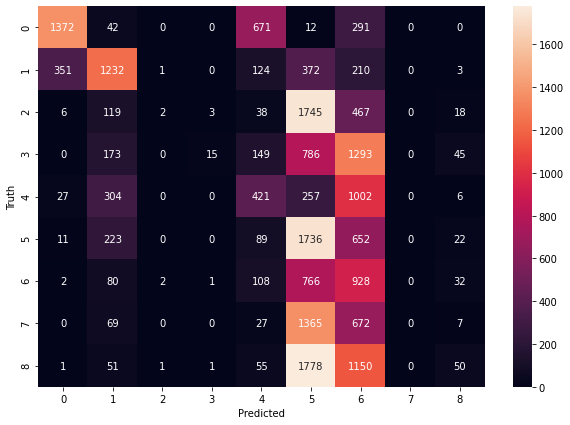

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')